### Visual intuition for the other definition of variance


I always think of the [variance](https://en.wikipedia.org/wiki/Variance) of some random variable $X$ as the variable's expected deviation from its mean $\mathbb{E}[X]$. That is, I think of the variance as:


$$Var(X)= \mathbb{E}[(X - \mathbb{E}[X])^2]$$

where the squared term ensures that the variance is non-negative. However, on Wikipedia and in textbooks the variance is also sometimes defined as:

$$Var(X) =\mathbb{E}[X^2] - \mathbb{E}[X]^2$$

which is expected value of $X$ squared, minus the expected square of $X$. I never find this second definition intuitive. This is a visual demonstration of why the variance can be expressed in this way. (If you are curious about the algebra too, see the end of the post).

### Get some data

Let's start by drawing some data from a 1 dimensional normal with some mean and some standard deviation. Below, I make a histogram to visualize the data and plot the data as blue dots along the x axis. Each little blue dot along the x-axis is some datapoint $x_i$.

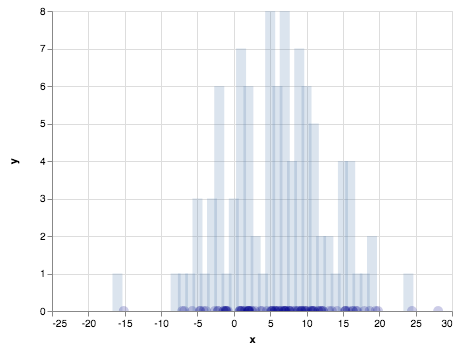

In [1]:
import numpy as np
from helper import *

mu, sigma = 6, 7 # mean and standard deviation
N = 100
nbins = 25

s =  np.random.normal(mu, sigma, size=N)

values, bins = np.histogram(s, bins=np.arange(-20, nbins + 1))

histogram = make_bar_chart(size=10, opacity=.1, X=bins, Y=values)

x_points = make_scatter_chart(opacity=.2, X=s, Y=np.zeros(len(s)))

histogram + x_points

### Square the data

The second definition of variance includes the square of each $x_i^2$ in the sample. I show the square of each $x_i$ along the y-axis with a red dot. We can see that the red dots sketch the curve of the function $x^2$. I show a little black line leading from each $x_i$ to its corresponding $x_i^2$.

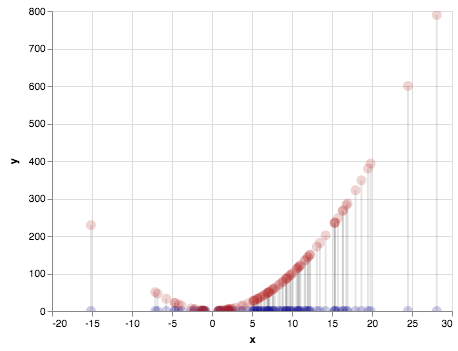

In [54]:
x2_points = make_scatter_chart(X=s, Y=[i ** 2 for i in s], color="firebrick")

guide_lines = make_guide_lines(s)

functools.reduce(lambda a,b : a+b,guide_lines + [x_points  + x2_points])

### Find the expectation of the squares

Because each $x_i$ has equal probability, if we average the y-coordinates of the black dots, we get the expected value of $x_i^2$, which is $\mathbb{E}[X^2] = \frac{\Sigma_i^N[x_i]}{N}$. We show $\mathbb{E}[X^2]$ as a big red dot on the chart. For clarity, I shift the axis a bit to zoom in.

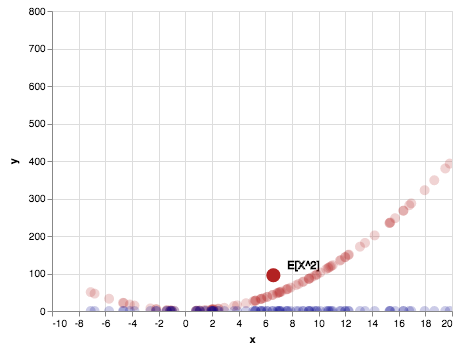

In [71]:
expected_x2, labels2 = make_scatter_chart_with_labels(X=[np.mean(s)], size=200, opacity=1, domain=(-10, 20), Y=[np.mean([i ** 2 for i in s])], L=["E[X^2]"], color="firebrick")
x2_points = make_scatter_chart(X=s, Y=[i ** 2 for i in s], color="firebrick", domain=(-10, 20))
x_points = make_scatter_chart(opacity=.2, X=s, Y=np.zeros(len(s)), domain=(-10, 20))

expected_x2 + labels2 + x2_points + x_points

### Finding the expectation of the sample

By the same logic, we can also simply average each $x_i$ to find the expected value of the sample $\mathbb{E}[X]$: shown as a half blue dot.

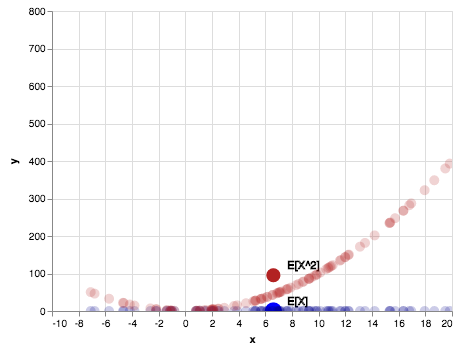

In [78]:
expected_x, labels = make_scatter_chart_with_labels(X=[np.mean(s)], Y=[0], L=["E[X]"],size=300, opacity =1) 
expected_x + labels + x_points + expected_x2 + labels2 + x2_points

### Square the expected value of the sample.

If we square the expected value of the sample (i.e. the blue dot) we get the value $\mathbb{E}[X]^2$. This will be a point along the red curve. We show this as a big black dot.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


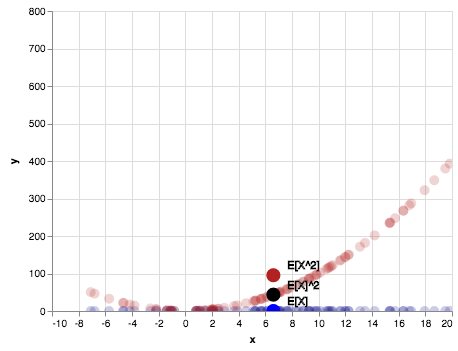

In [83]:
%load_ext autoreload
%autoreload 2

domain = (-10, 20)
x_points = make_scatter_chart(opacity=.2, X=s, Y=np.zeros(len(s)), domain=domain)
expected_x, labels = make_scatter_chart_with_labels(X=[np.mean(s)], Y=[0], L=["E[X]"], domain=domain, opacity=1)
expectedx2, labelsx2 = make_scatter_chart_with_labels(X=[np.mean(s)], Y=[np.mean(s) ** 2], L=["E[X]^2"], domain=domain, color="black", opacity=1)
expected_x2, labels2 = make_scatter_chart_with_labels(X=[np.mean(s)], Y=[np.mean([i ** 2 for i in s])], L=["E[X^2]"], domain=domain, opacity=1, color="firebrick")
x2_points = make_scatter_chart(opacity=.2, X=s, Y=[i ** 2 for i in s], color="firebrick", domain=domain, size=100)

x_points + expected_x + labels + expected_x2 + labels2 + x2_points + expectedx2 + labelsx2

### A visual intition for the variance

The distance between the red dot and the black dot is $\mathbb{E}[X^2]$ - $\mathbb{E}[X]^2$ is equal to $Var(X)$: the variance!

Because $\mathbb{E}[X^2]$ is always above the black squares line, this also doubles as a visual proof that the variance is always non-negative. (See also this [awesome visual proof](http://mark.reid.name/blog/behold-jensens-inequality.html) of Jensen's Inequality, which gave me the idea for this post).


### Plowing through the algebra 

This post is devoted to providing a visual intution for the alternate definition of variance. If you are curious about the algebra behind the definition, here is a detailed derivation as well.

Starting from the definition and expanding the square we have

$$Var(X) = \mathbb{E}[(x - \mathbb{E}[X])^2]$$

$$Var(X) = \mathbb{E}[X^2 - 2XE[X] + \mathbb{E}[X]^2]$$

From linearity of expectation we have:

$$Var(X) = \mathbb{E}[X^2]-  \mathbb{E}[2XE[X]] +  \mathbb{E}[\mathbb{E}[X]^2]$$

We can pull out the constants 2 and $\mathbb{E}[X]$ from the expectation in the middle term to get:

$$Var(X) = \mathbb{E}[X^2]-  2\mathbb{E}[X]\mathbb{E}E[X] +  \mathbb{E}[\mathbb{E}[X^2]$$

We can also express the middle term as $2\mathbb{E}[X^2]$ to get

$$Var(X) = \mathbb{E}[X^2]-  2\mathbb{E}[X^2]+  \mathbb{E}[X^2]$$

$$Var(X) = \mathbb{E}[X^2]-  \mathbb{E}[X^2] -  \mathbb{E}[X^2]+  \mathbb{E}[X^2]$$

$$Var(X) = \mathbb{E}[X^2] -   \mathbb{E}[X^2]$$